In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
taxis = sns.load_dataset("taxis")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
taxis.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [6]:
taxis.payment.value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

# Funcion: describe_df
Esta función debe recibir como argumento un dataframe y debe devolver una dataframe como el de la imagen (NO el de la imagen). Es decir, un dataframe que tenga una columna por cada variable del dataframe original, y como filas los tipos de dichas variables, el tanto por ciento de valores nulos o missings, los valores únicos y el porcentaje de cardinalidad.

La figura muestra el resultado esperado de llamar a la función con el dataset del Titanic:

In [7]:
from toolbox_ML import describe_df

describe_df(tips)

,total_bill,tip,sex,smoker,day,time,size
DATA_TYPE,float64,float64,category,category,category,category,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,229,123,2,2,4,2,6
CARD (%),93.85,50.41,0.82,0.82,1.64,0.82,2.46


In [8]:
describe_df(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
DATA_TYPE,float64,float64,float64,float64,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,35,23,43,22,3
CARD (%),23.33,15.33,28.67,14.67,2.0


In [9]:
describe_df(taxis)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
DATA_TYPE,datetime64[ns],datetime64[ns],int64,float64,float64,float64,float64,float64,object,object,object,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.68,0.4,0.7,0.4,0.7
UNIQUE_VALUES,6414,6425,7,1079,220,489,16,898,2,2,194,203,4,5
CARD (%),99.7,99.88,0.11,16.77,3.42,7.6,0.25,13.96,0.03,0.03,3.02,3.16,0.06,0.08


# Funcion: tipifica_variables
Esta función debe recibir como argumento un dataframe, un entero (umbral_categoria) y un float (umbral_continua). 

La función debe devolver un dataframe con dos columnas "nombre_variable", "tipo_sugerido" que tendrá tantas filas como columnas el dataframe. En cada fila irá el nombre de una de las columnas y una sugerencia del tipo de variable. Esta sugerencia se hará siguiendo las siguientes pautas:

Si la cardinalidad es 2, asignara "Binaria"
Si la cardinalidad es menor que umbral_categoria asignara "Categórica"
Si la cardinalidad es mayor o igual que umbral_categoria, entonces entra en juego el tercer argumento:
Si además el porcentaje de cardinalidad es superior o igual a umbral_continua, asigna "Numerica Continua"
En caso contrario, asigna "Numerica Discreta"

In [10]:
from toolbox_ML import tipifica_variables

tipifica_variables(iris, 8, 20)

,Tipo_sugerido
sepal_length,Numerica continua
sepal_width,Numerica discreta
petal_length,Numerica continua
petal_width,Numerica discreta
species,Categorica


In [11]:
tipifica_variables(taxis, 6, 50)

,Tipo_sugerido
pickup,Numerica continua
dropoff,Numerica continua
passengers,Numerica discreta
distance,Numerica discreta
fare,Numerica discreta
tip,Numerica discreta
tolls,Numerica discreta
total,Numerica discreta
color,Binaria
payment,Binaria


# Funcion: get_features_num_regression
Esta función recibe como argumentos un dataframe,
 el nombre de una de las columnas del mismo (argumento 'target_col'),que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad, además de un argumento 'umbral_corr', de tipo float que debe estar entre 0 y 1 y una variable float "pvalue" cuyo valor debe ser por defecto "None".

La función debe devolver una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr". Además si la variable "pvalue" es distinta de None, sólo devolvera las columnas numéricas cuya correlación supere el valor indicado y además supere el test de hipótesis con significación mayor o igual a 1-pvalue.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [12]:
from toolbox_ML import get_features_num_regression

get_features_num_regression(tips, "tip", (0.2), pvalue=None)

['total_bill']

In [13]:
get_features_num_regression(iris, "sepal_length", (0.7), pvalue=None)

['sepal_length']

In [14]:
get_features_num_regression(taxis, "fare", (0.1), pvalue=None)

[]

# Funcion: plot_features_num_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un valor de correlación ("umbral_corr", con valor 0 por defecto) y un argumento ("pvalue") con valor "None" por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

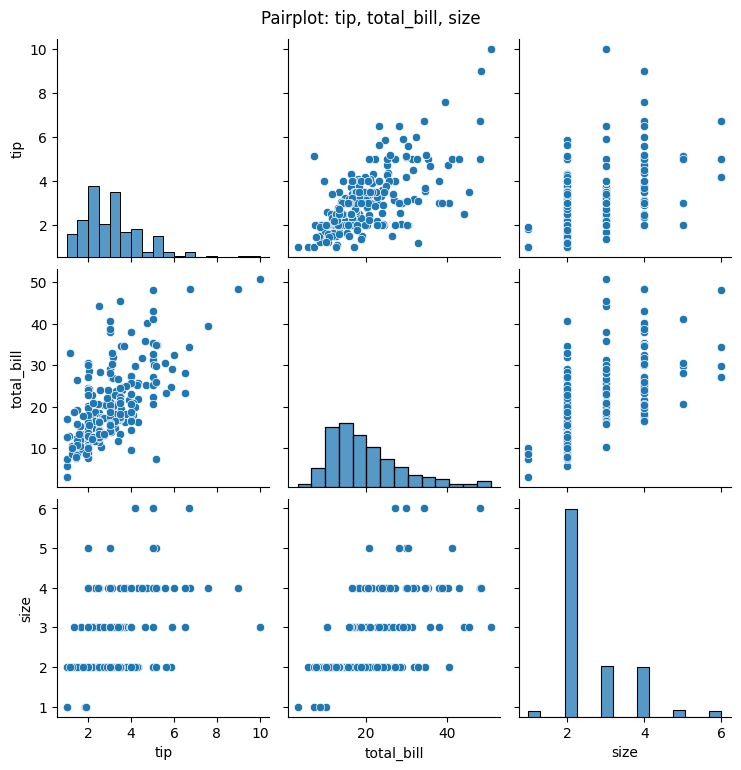

['total_bill', 'size']

In [15]:
from toolbox_ML import plot_features_num_regression

plot_features_num_regression(tips, target_col = "tip")

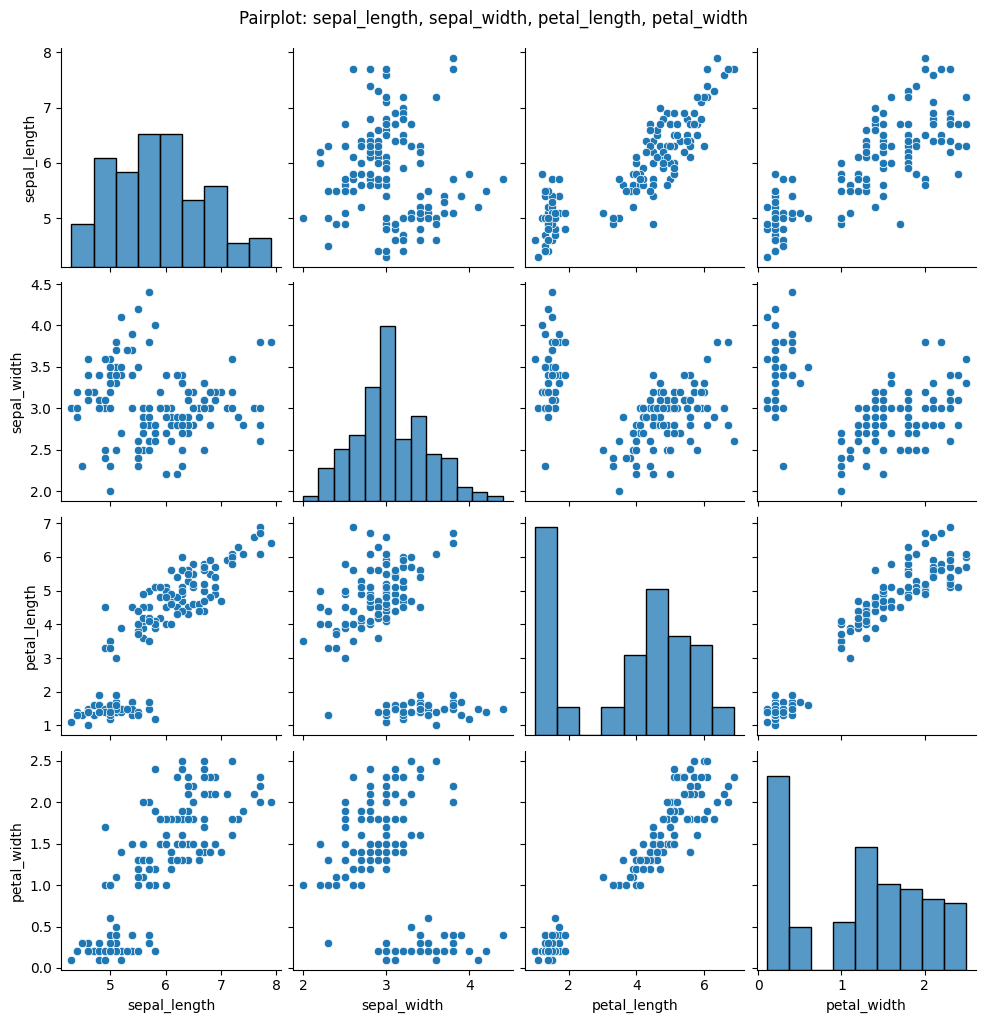

['sepal_width', 'petal_length', 'petal_width']

In [16]:
plot_features_num_regression(iris, target_col = "sepal_length")

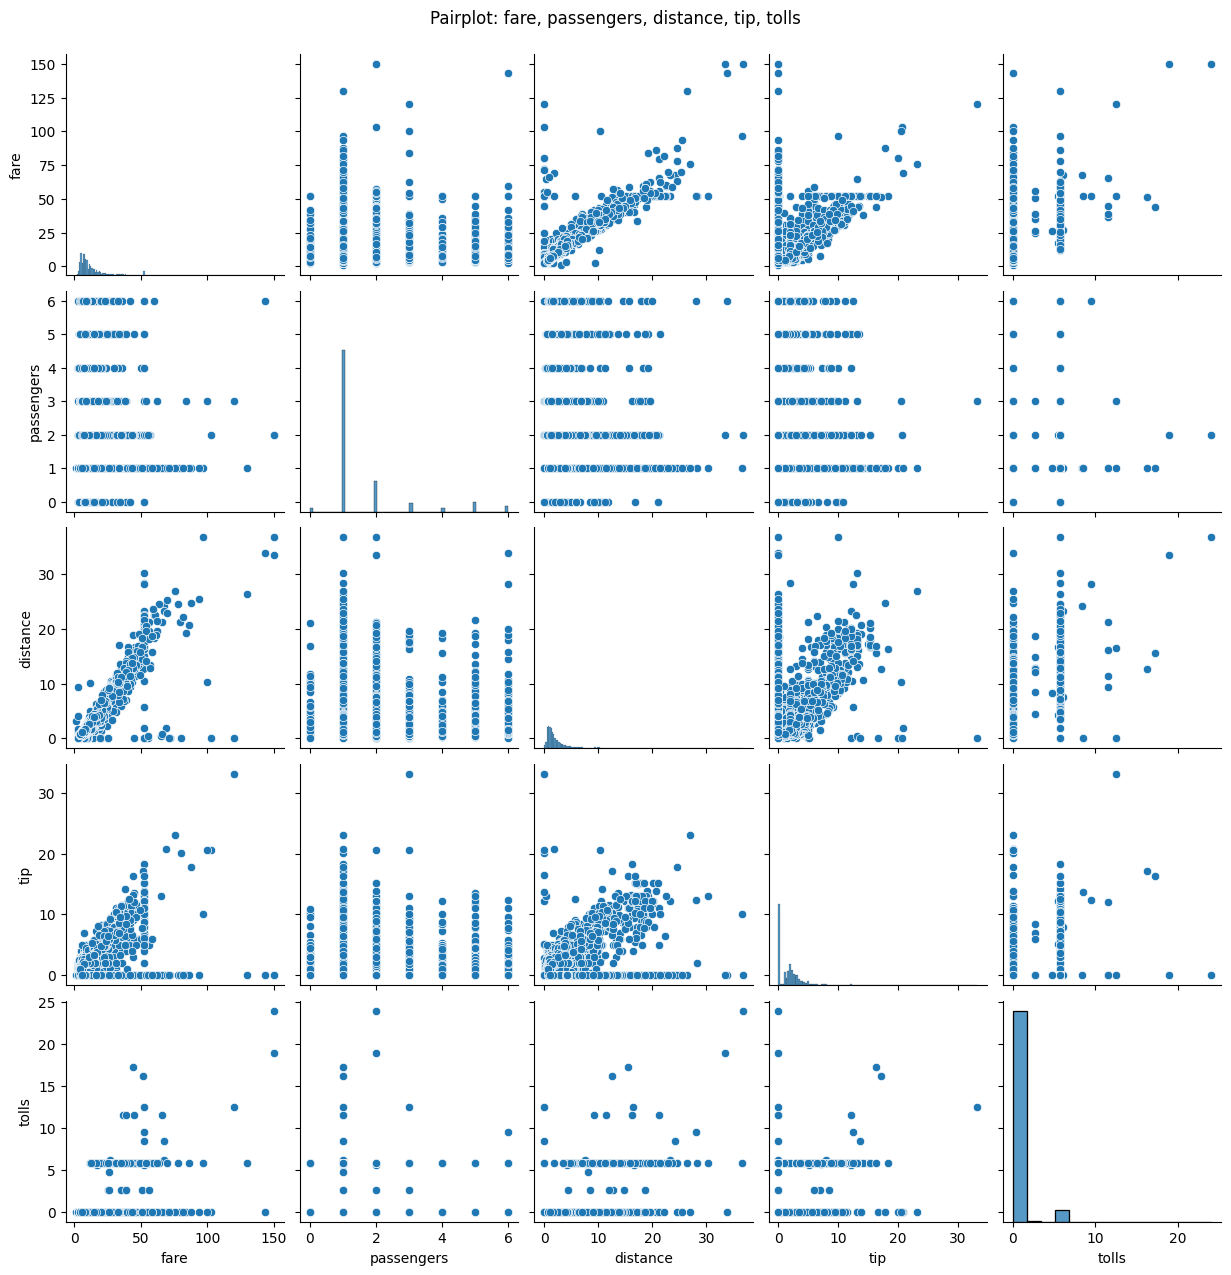

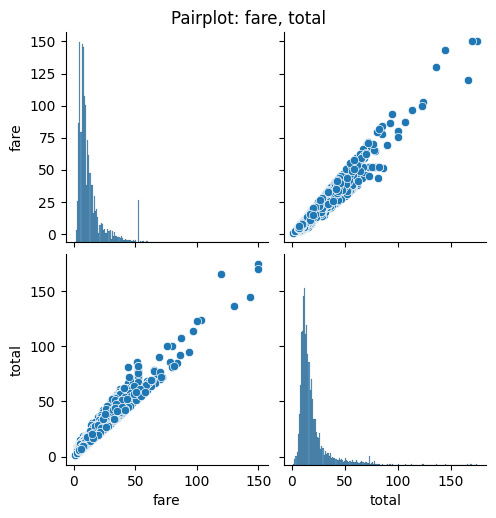

['passengers', 'distance', 'tip', 'tolls', 'total']

In [17]:
plot_features_num_regression(taxis, target_col = "fare")

# Funcion: get_features_cat_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad y una variable float "pvalue" cuyo valor por defecto será 0.05.

La función debe devolver una lista con las columnas categóricas del dataframe cuyo test de relación con la columna designada por 'target_col' supere en confianza estadística el test de relación que sea necesario hacer (es decir la función debe poder escoger cuál de los dos test que hemos aprendido tiene que hacer).

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [18]:
from toolbox_ML import get_features_cat_regression

cat_selected = get_features_cat_regression(tips, target_col = "tip")
cat_selected

['day', 'time']

In [19]:
cat_selected = get_features_cat_regression(taxis, target_col = "fare")
cat_selected

[]

In [20]:
cat_selected = get_features_cat_regression(iris, target_col = "sepal_length")
cat_selected

['species']

### Funcion: plot_features_cat_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("pvalue") con valor 0.05 por defecto y un argumento "with_individual_plot" a False.

Si la lista no está vacía, la función pintará los histogramas agrupados de la variable "target_col" para cada uno de los valores de las variables categóricas incluidas en columns que cumplan que su test de relación con "target_col" es significatio para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_regression`.

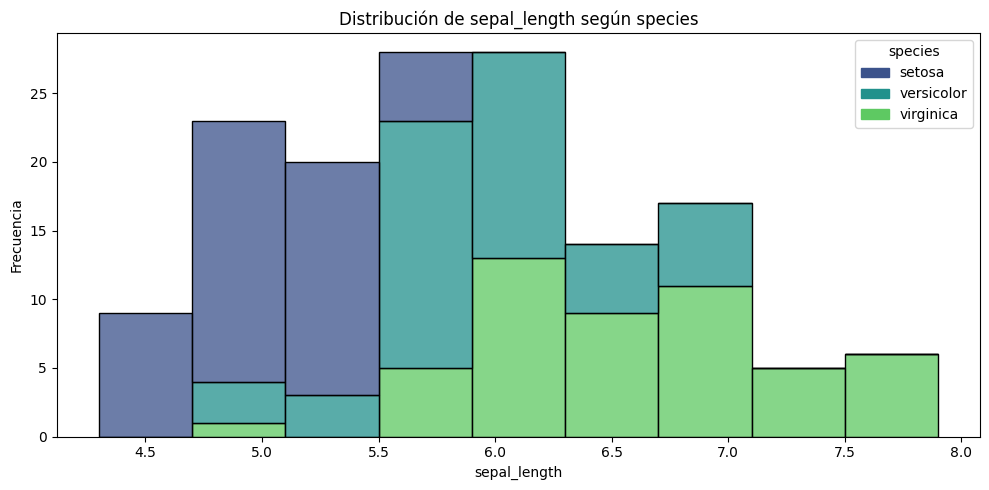

['species']

In [24]:
from toolbox_ML import plot_features_cat_regression

plot_features_cat_regression(iris, target_col = "sepal_length" , columns = cat_selected, with_individual_plot= False)